# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt


In [134]:
def explain(sl, moves, update_f=None):
    
    n = len(moves)+1
    
    fig, axes = plt.subplots(n,1, figsize=(20,n*2.5))
    axes = np.ravel(axes)
    axi = 0

    for move in moves:
        s = sl.rmove(move, update=False)
        plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
        display(sl.params); 
        print('---')
        if update_f:
            update_f(sl, s)
            
    plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
    display(sl.params); 
    print('---')

,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
1,1,0,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
1,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
2,2,0,0.0,5000,1.00,-1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
1,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
2,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
3,3,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
3,3,0,1.0,5000.0,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
4,4,0,0.0,2500.0,0.50,1,5000,5000,0.0,0.0,2500.0,0.5,5000,5000,0.0,0.0,5000,5000,2500.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
3,3,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
4,4,0,0.5,2500.0,0.55,1,5000,5000,0.0,0.0,2250.0,0.4,5000,5000,250.0,0.1,0,0,2250.0
5,5,0,0.0,5000.0,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000.0,250.0,0.1,0,0,4500.0
3,3,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
4,4,0,0.5,2500.0,0.50,1,5000,5000,0.0,0.0,2500.0,0.5,5000,5000.0,0.0,0.0,5000,5000,2500.0
5,5,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0


---


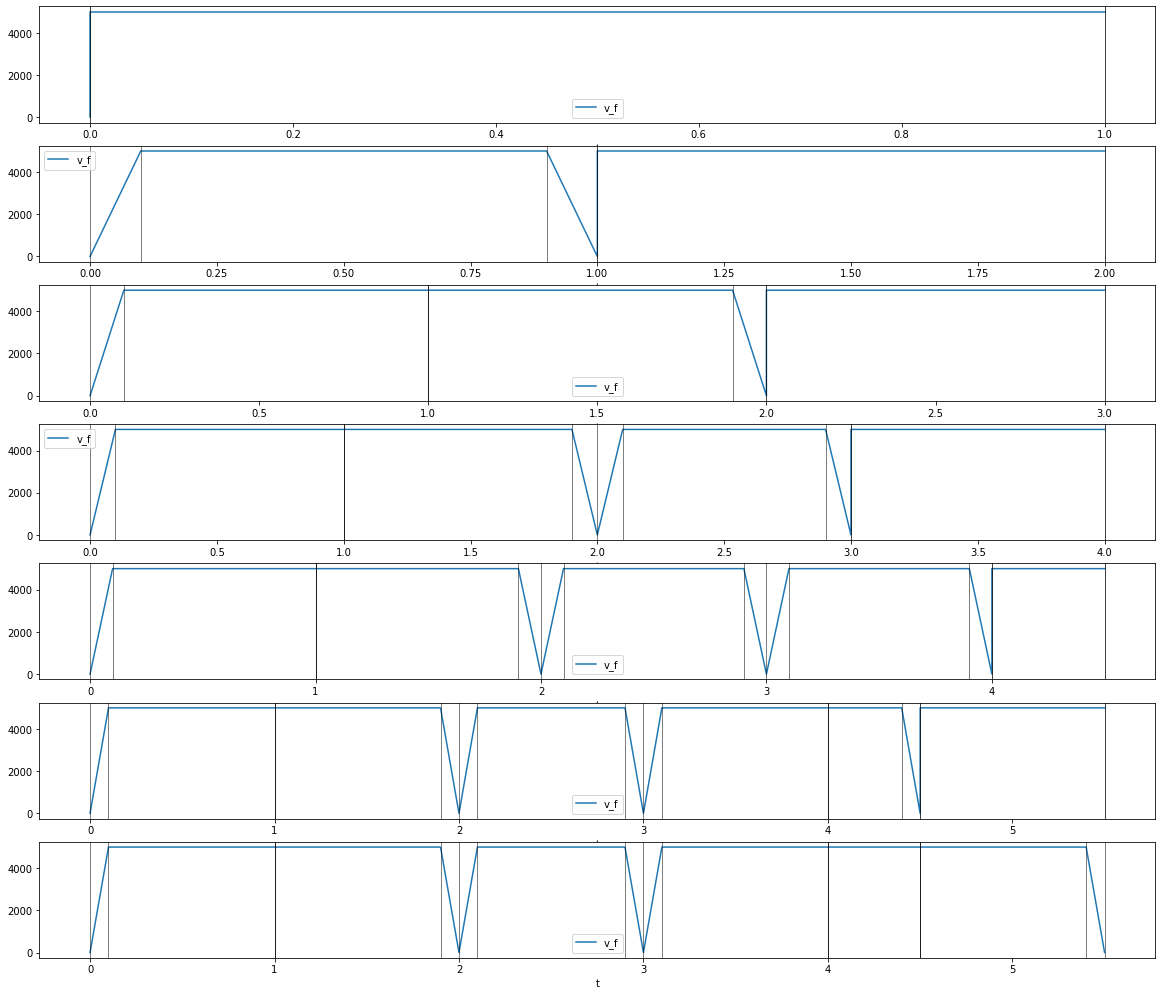

In [156]:

sl = SegmentList([Joint(5_000, 50_000)])
x = 5000


def update_f(sl, s):
    s.update_min_time()
    
    if s.prior_seg:
        s.update_min_time()
    
    s.update_boundary_velocities()
      
    sl.recalc()

explain(sl, ( [x], [x], [-x], [x], [x/2],[x] ), update_f )


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000.0
1,0,1,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
1,0,1,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500.0
2,1,0,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0
3,1,1,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750.0
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
3,1,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750.0
4,2,0,0.0,5000,1.00,-1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0
5,2,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0
3,1,1,1.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0
4,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000.0,250.0,0.1,0,0,4500.0
5,2,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0
6,3,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0
7,3,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000.0,0.0,0.0,5000,5000,4750.0
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0
3,1,1,1.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0
4,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000.0,250.0,0.1,0,0,4500.0
5,2,1,1.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0
6,3,0,1.0,5000,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000.0,250.0,0.1,0,0,4500.0
7,3,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000.0,250.0,0.1,0,0,4750.0
8,4,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0
9,4,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000.0,0.0,0.0,5000,5000,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.050,1,0,0,250.0,0.1,4750.0,0.900,5000,5000.0,0.0,0.0,5000,5000,4750.0
1,0,1,1.0,5000,1.050,1,0,0,250.0,0.1,4750.0,0.900,5000,5000.0,0.0,0.0,5000,5000,4750.0
2,1,0,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000.0,250.0,0.1,0,0,4750.0
3,1,1,1.0,5000,1.000,1,5000,5000,0.0,0.0,5000.0,1.000,5000,5000.0,0.0,0.0,5000,5000,5000.0
4,2,0,1.0,5000,1.100,-1,0,0,250.0,0.1,4500.0,0.800,5000,5000.0,250.0,0.1,0,0,4500.0
5,2,1,1.0,5000,1.000,1,5000,5000,0.0,0.0,5000.0,1.000,5000,5000.0,0.0,0.0,5000,5000,5000.0
6,3,0,1.0,5000,1.050,1,0,0,250.0,0.1,4750.0,0.900,5000,5000.0,0.0,0.0,5000,5000,4750.0
7,3,1,1.0,5000,1.000,1,5000,5000,0.0,0.0,5000.0,1.000,5000,5000.0,0.0,0.0,5000,5000,5000.0
8,4,0,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000.0,250.0,0.1,0,0,4750.0
9,4,1,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000.0,250.0,0.1,0,0,4750.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.05,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.0,5000.0,5000.0,4750.0
1,0,1,1.0,5000,1.05,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.0,5000.0,5000.0,4750.0
2,1,0,1.0,5000,1.05,1,5000.0,5000.0,0.0,0.00,4750.0,0.90,5000,5000.0,250.0,0.1,0.0,0.0,4750.0
3,1,1,1.0,5000,1.00,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.0,5000.0,5000.0,5000.0
4,2,0,1.0,5000,1.10,-1,0.0,0.0,250.0,0.10,4500.0,0.80,5000,5000.0,250.0,0.1,0.0,0.0,4500.0
5,2,1,1.0,5000,1.00,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.0,5000.0,5000.0,5000.0
6,3,0,1.0,5000,1.05,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.0,5000.0,5000.0,4750.0
7,3,1,1.0,5000,1.00,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.0,5000.0,5000.0,5000.0
8,4,0,1.0,5000,1.00,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.0,1000.0,1000.0,5000.0
9,4,1,1.0,5000,1.00,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.0,5000.0,5000.0,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.050,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.00,5000.0,5000.0,4750.0
1,0,1,1.0,5000,1.050,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.00,5000.0,5000.0,4750.0
2,1,0,1.0,5000,1.050,1,5000.0,5000.0,0.0,0.00,4750.0,0.90,5000,5000.0,250.0,0.10,0.0,0.0,4750.0
3,1,1,1.0,5000,1.000,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.00,5000.0,5000.0,5000.0
4,2,0,1.0,5000,1.100,-1,0.0,0.0,250.0,0.10,4500.0,0.80,5000,5000.0,250.0,0.10,0.0,0.0,4500.0
5,2,1,1.0,5000,1.000,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.00,5000.0,5000.0,5000.0
6,3,0,1.0,5000,1.050,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.00,5000.0,5000.0,4750.0
7,3,1,1.0,5000,1.000,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.00,5000.0,5000.0,5000.0
8,4,0,1.0,5000,1.032,1,5000.0,5000.0,0.0,0.00,4760.0,0.92,5000,5000.0,240.0,0.08,1000.0,1000.0,4840.0
9,4,1,1.0,5000,1.000,1,5000.0,5000.0,0.0,0.00,5000.0,1.00,5000,5000.0,0.0,0.00,5000.0,5000.0,5000.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,1.0,5000,1.050,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.00,5000.0,5000.0,4750.0
2,1,0,1.0,5000,1.050,1,5000.0,5000.0,0.0,0.00,4750.0,0.90,5000,5000.0,250.0,0.10,0.0,0.0,4750.0
4,2,0,1.0,5000,1.100,-1,0.0,0.0,250.0,0.10,4500.0,0.80,5000,5000.0,250.0,0.10,0.0,0.0,4500.0
6,3,0,1.0,5000,1.050,1,0.0,0.0,250.0,0.10,4750.0,0.90,5000,5000.0,0.0,0.00,5000.0,5000.0,4750.0
8,4,0,1.0,5000,1.032,1,5000.0,5000.0,0.0,0.00,4760.0,0.92,5000,5000.0,240.0,0.08,1000.0,1000.0,4840.0
10,5,0,0.2,10,0.020,1,1000.0,1000.0,10.0,0.02,0.0,0.18,5000,0.0,0.0,0.00,0.0,0.0,10.0
12,6,0,1.0,5000,1.100,1,0.0,0.0,250.0,0.10,4500.0,0.80,5000,5000.0,250.0,0.10,0.0,0.0,4500.0


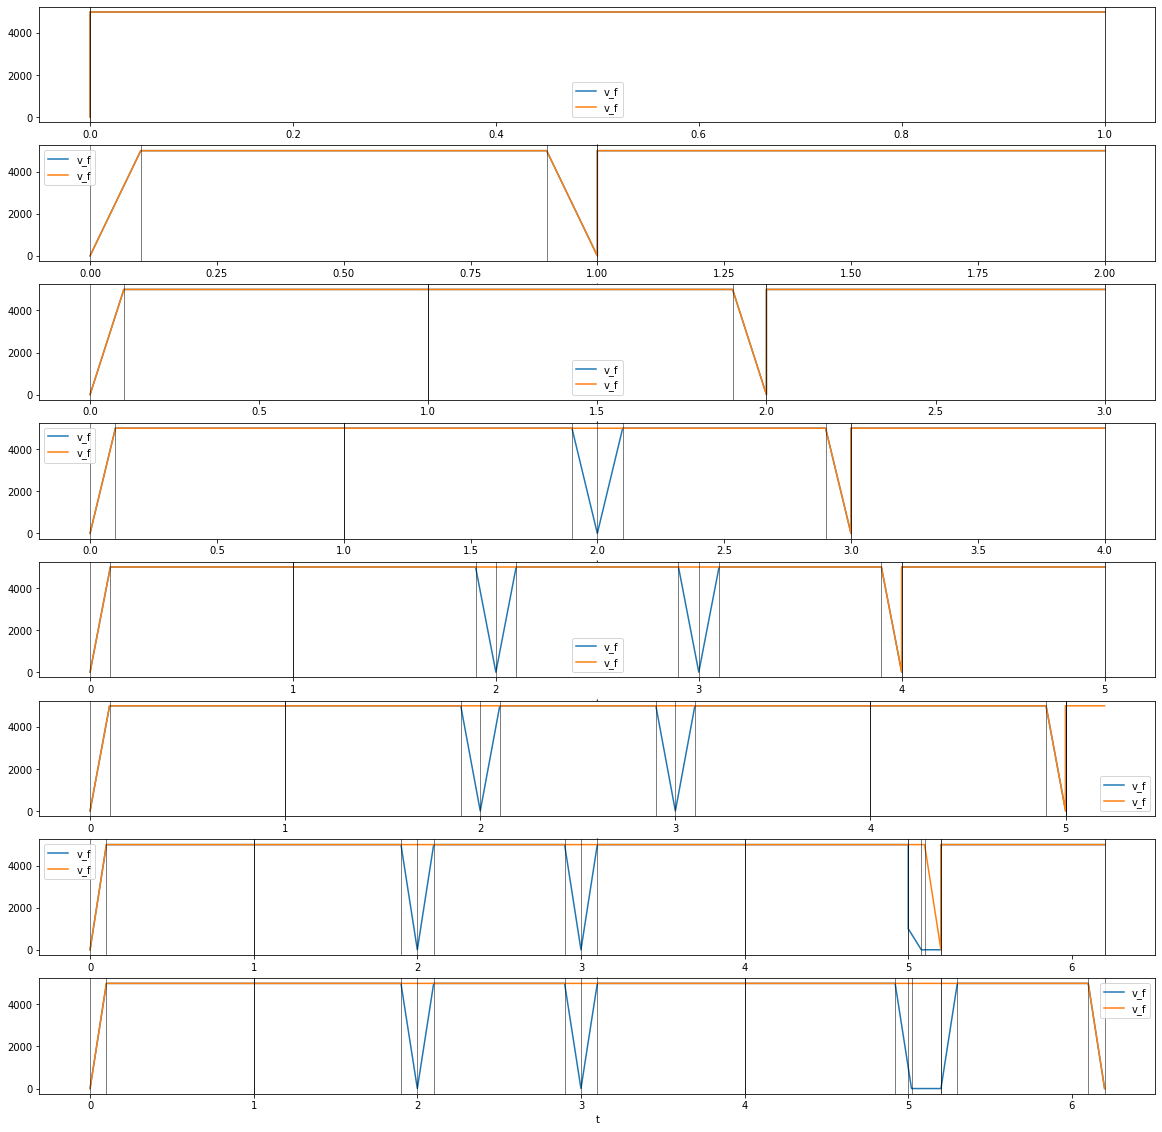

In [171]:


sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000)])
x = 5000


def update_f(sl, s):
    s.update_min_time()
    
    s.update_boundary_velocities()
        
    sl.recalc()

explain(sl, ( [x,x], [x,x], [-x,x], [x,x], [x,x], [10,1000], [x,x] ), update_f )

t = sl.params
t[t.js == 0]

,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x
0,0,0,0.6,3000,0.682,1,0.0,0.0,250.0,0.10,2510.0,0.42,5000,5000.0,240.0,0.08,1000.0,1000.0,2590.0
2,1,0,0.2,10,0.020,1,1000.0,1000.0,10.0,0.02,0.0,0.18,5000,0.0,0.0,0.00,0.0,0.0,10.0
4,2,0,0.6,3000,0.700,1,0.0,0.0,250.0,0.10,2500.0,0.40,5000,5000.0,250.0,0.10,0.0,0.0,2500.0


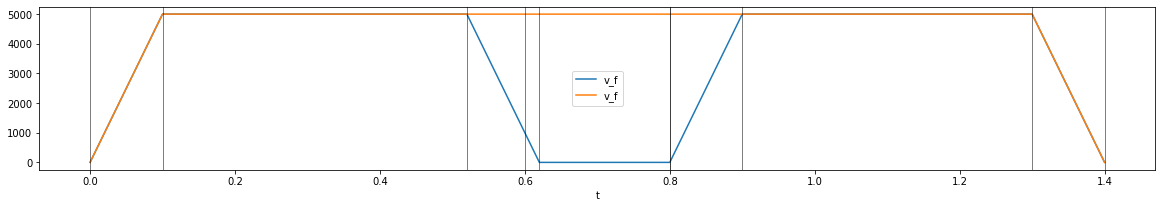

In [175]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])
sl.rmove([x,x]);
sl.rmove([10,1000]);
sl.rmove([x,x]);

plot_segment_list(sl.dataframe)
t = sl.params
t[t.js == 0]

,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,kind
0,0,0,0.700000,3000,0.700000,1,0.00000,0.000000,210.069444,0.091667,2750.000000,0.600000,5000,4583.333333,39.930556,0.008333,4583.333333,5000,╱▔▔
2,1,0,0.650347,100,0.191667,1,3162.27766,4583.333333,210.069444,0.091667,-360.069444,0.458681,5000,0.000000,250.000000,0.100000,0.000000,5000,▔▔▔
4,2,0,0.700000,3000,0.700000,1,5000.00000,0.000000,250.000000,0.100000,2500.000000,0.500000,5000,5000.000000,250.000000,0.100000,0.000000,0,╲▁▁▔▔╲
6,3,0,0.651046,0,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.651046,0,0.000000,0.000000,0.000000,0.000000,0,▁▁▁
8,4,0,0.700000,3000,0.700000,1,0.00000,0.000000,250.000000,0.100000,2500.000000,0.500000,5000,5000.000000,250.000000,0.100000,0.000000,0,╱▔╲ ╱╲


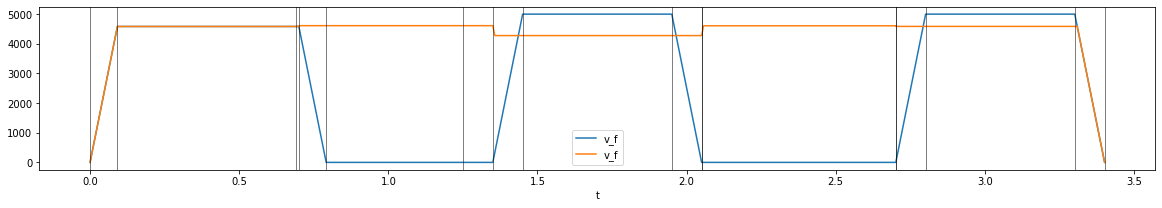

In [5]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([100,x]);
sl.rmove([x,x]);
sl.rmove([0,x]);
sl.rmove([x,x]);


plot_segment_list(sl.dataframe)
t = sl.params
t[t.js == 0]

[0    |0        250%0.00000 ↗ 0@0%0.00000 ↘    250%0.00000     0|    0]
0.0


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,kind
0,0,0,0.2,500,0.2,1,0,0,250.0,0.1,0.0,0.0,5000,0,250.0,0.1,0,0,╱▔╲ ╱╲


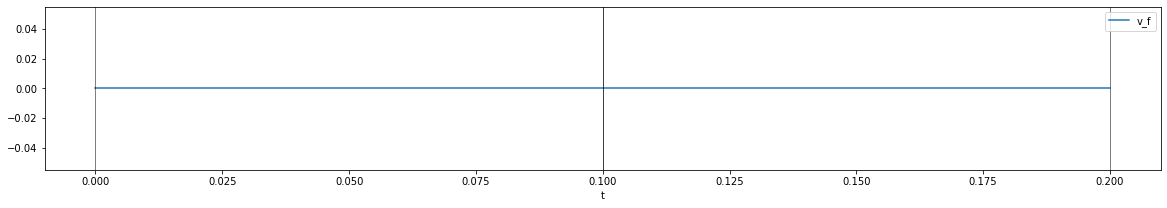

In [15]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 500


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
print(sl[0,0].x_c)
sl.params

[0    |0        250%0.00000 ↗ 1@4999%0.00000 ↘    250%0.00000     0|    0]


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,kind
0,0,0,0.2002,501,0.2002,1,0,0,250.0,0.1,1.0,0.0002,5000,5000.0,250.0,0.1,0,0,╱▔╲ ╱╲


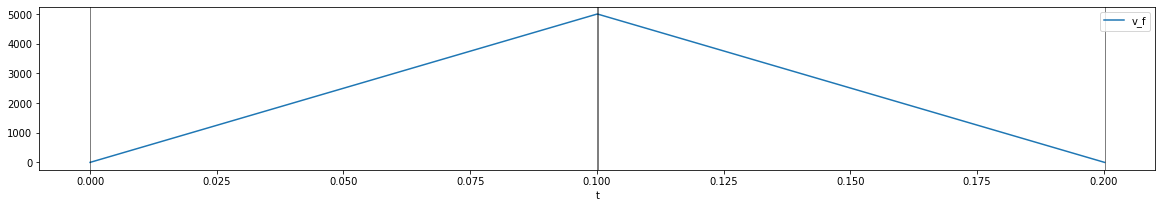

In [16]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 501



sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [17]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 499


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

ValidationError: Negative tc

1.1000|[0        250↗  4500@5000  ↘250        0]
---
1.1000|[0        250↗  4750@4750  ↘0       4750]
1.0501|[4750      24↗  4726@5000  ↘250        0]
---
1.1000|[0        225↗  4750@4749  ↘24      4749]
1.0501|[4749      24↗  4976@4760  ↘0       4760]
1.0501|[4760      23↗  4727@5000  ↘250        0]
---
1.1000|[0        225↗  4750@4750  ↘24      4750]
1.0501|[4750       1↗  4976@4760  ↘23      4760]
1.0501|[4760      23↗  4727@5000  ↘250        0]
---


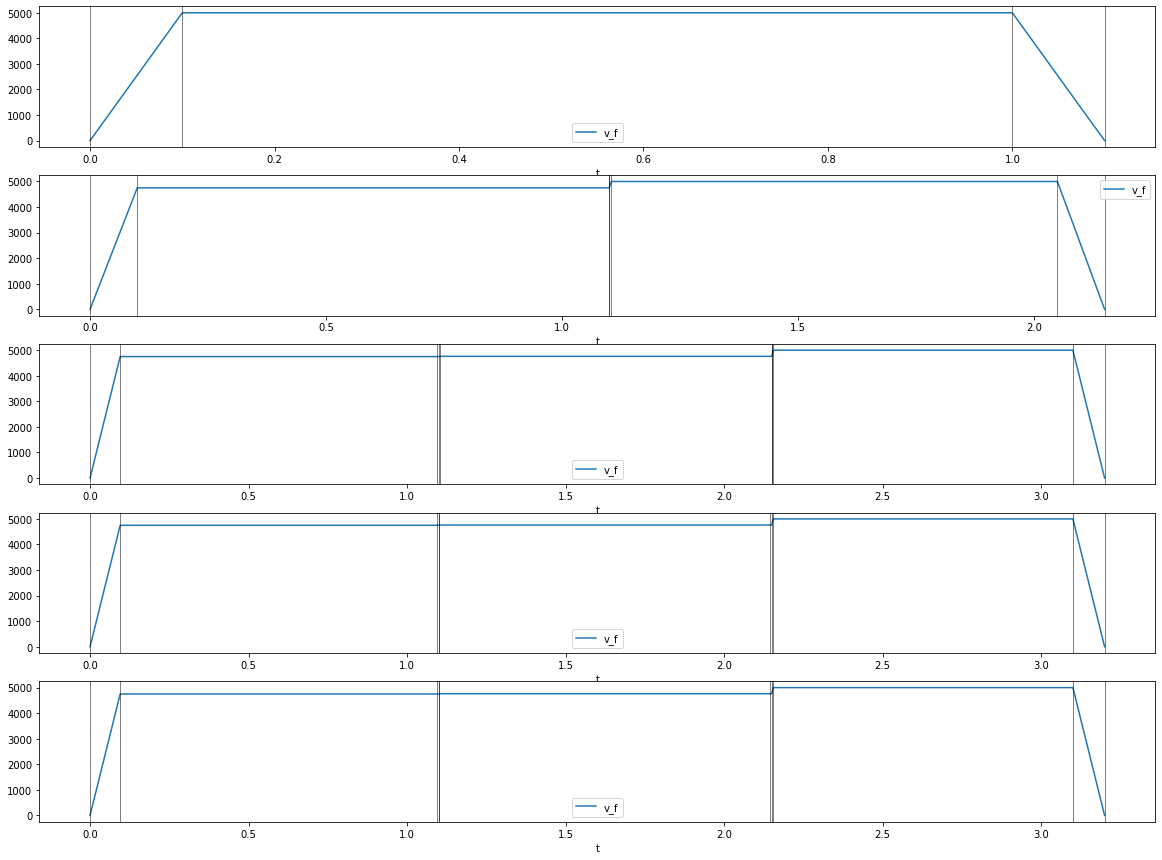

In [18]:
sl = SegmentList([Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(5,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

In [ ]:
from trajectory.planner import accel_x

js = sl.segments[0].joint_segments[0]

def min_t(self):
    print(self.t, self.segment.t)
    
    v_c = self.v_c
    
    self.x_a, self.t_a = accel_x(self.v_0, v_c, self.joint.a_max)
    self.x_d, self.t_d = accel_x(v_c, self.v_1, self.joint.a_max)
    
    print(v_c, self.segment.t - self.t_a - self.t_d)
    
    
min_t(js)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 1500

for i in range(10):
    sl.rmove([x,x])


print(sl)
plot_segment_list(sl.dataframe)

sl.reset()
sl.update(limit=None)
sl.update(limit=None)
sl.update(limit=None)

print('----')
print(sl)
plot_segment_list(sl.dataframe)


In [ ]:
js = sl.segments[1].joint_segments[0]
print(js)
(js.t_a, js.t_c, js.t_d), (js.v_0_max, js.v_0 ,js.v_c, js.v_1, js.v_1_max)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([x/10,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)





In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)


In [ ]:
sl.dataframe.set_index(['t','axis']).sort_index().reset_index()

In [ ]:
# a = 7550 passes, 7499 does not. 
sl = SegmentList([Joint(5_000, 7_499),Joint(5_000, 7_499)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,-x])
sl.rmove([-x,x])
sl.rmove([x,x])
for i in range(10):
    sl.update()
    print(round(sl.err_t,5), round(sum([s.err_t for s in sl.segments]), 5), [ (s.n_updates, s.err_t) for s in sl.segments])
    print('===')

plot_segment_list(sl.dataframe)

In [ ]:
print([s.err_t for s in sl.segments])

In [ ]:
sl.rmove([x,x])
sl.update()
sl.update() 
sl.update()
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([x,x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x/2, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x, x])
sl.rmove([0, x])
sl.rmove([x, x])
sl.rmove([-x, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
def max_v_0(x, a):
    """Return the maximum v_0 for a segment of distance x such that  we can
    decelerate and not exceede distance x"""

    # decel time t = v0/a
    # x = (v_i+v_f)/2 * t -> v0/2 * t
    # x = v0/2 * v0/a
    # x = v0^2/2a
    return sqrt(2 * a * x)

max_v_0(100,50_000)